In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

In [2]:
re=pd.read_excel(r'Results_diff_hyperparameters/Average_results_hyperparameters.xlsx')

### Average rewards and steps with different $\gamma$ (fixed $\beta$; 100000 episodes)

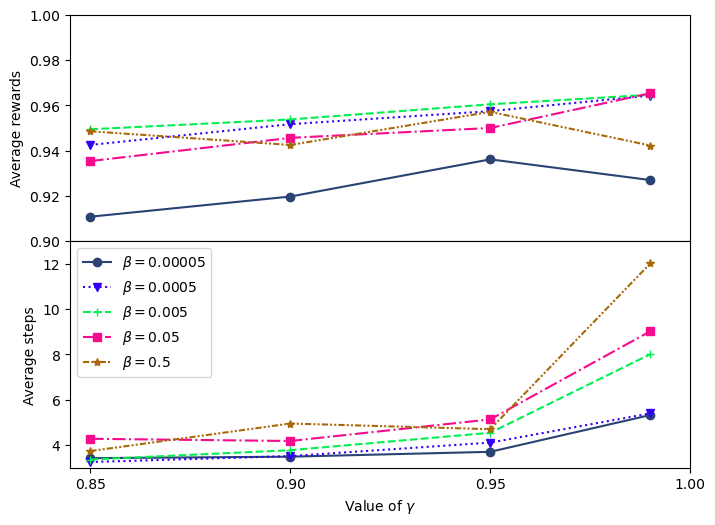

In [3]:
figure,(ax1,ax2)=plt.subplots(2,1,figsize=(8,6), dpi=100,sharex=True)

beta000005 = re['beta'] == 0.00005
beta00005 = re['beta'] == 0.0005
beta0005 = re['beta'] == 0.005
beta005 = re['beta'] == 0.05
beta05 = re['beta'] == 0.5

gamma_list = [0.85,0.90,0.95,0.99]

ax1.plot(gamma_list, re['rewards'][beta000005] ,c='#2A4373',ls='-',marker='o',label='$\\beta=0.00005$')
ax1.plot(gamma_list, re['rewards'][beta00005] ,c='#3400F5',ls=':',marker='v',label='$\\beta=0.0005$')
ax1.plot(gamma_list, re['rewards'][beta0005] ,c='#01F051',ls='--',marker='+',label='$\\beta=0.005$')
ax1.plot(gamma_list, re['rewards'][beta005] ,c='#F50B8C',ls='-.',marker='s',label='$\\beta=0.05$')
ax1.plot(gamma_list, re['rewards'][beta05] ,c='#A86A09',ls=(0,(3,1,1,1,1,1)),marker='*',label='$\\beta=0.5$')

ax2.plot(gamma_list, re['steps'][beta000005] ,c='#2A4373',ls='-',marker='o',label='$\\beta=0.00005$')
ax2.plot(gamma_list, re['steps'][beta00005] ,c='#3400F5',ls=':',marker='v',label='$\\beta=0.0005$')
ax2.plot(gamma_list, re['steps'][beta0005] ,c='#01F051',ls='--',marker='+',label='$\\beta=0.005$')
ax2.plot(gamma_list, re['steps'][beta005] ,c='#F50B8C',ls='-.',marker='s',label='$\\beta=0.05$')
ax2.plot(gamma_list, re['steps'][beta05] ,c='#A86A09',ls=(0,(3,1,1,1,1,1)),marker='*',label='$\\beta=0.5$')

ax1.set_ylabel('Average rewards')
ax2.set_ylabel('Average steps')
ax2.set_xlabel('Value of $\gamma$')

ax1.set_xlim((0.845, 1.0))
ax1.set_ylim((0.90, 1))
ax2.set_ylim((3, 13))

x_major_locator=MultipleLocator(0.05)
ax1.xaxis.set_major_locator(x_major_locator)

ax2.legend()
figure.subplots_adjust(hspace=0)
figure.savefig("Results_diff_hyperparameters/gamma_change.png")


### Average rewards and steps with different $\beta$ (fixed $\gamma$; 100000 episodes)

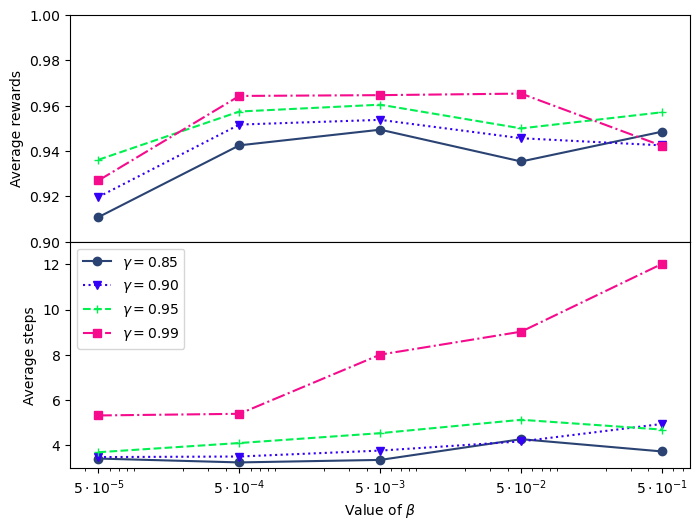

In [4]:
figure,(ax1,ax2)=plt.subplots(2,1,figsize=(8,6), dpi=100,sharex=True)

gamma85 = re['gamma'] == 0.85
gamma90 = re['gamma'] == 0.90
gamma95 = re['gamma'] == 0.95
gamma99 = re['gamma'] == 0.99

beta_list =  [0.00005,0.0005,0.005,0.05,0.5]
beta_list_lables = ['$5 \cdot 10^{-5}$',
                    '$5 \cdot 10^{-4}$',
                    '$5 \cdot 10^{-3}$',
                    '$5 \cdot 10^{-2}$',
                    '$5 \cdot 10^{-1}$']

ax1.semilogx(beta_list, re['rewards'][gamma85] ,c='#2A4373',ls='-',marker='o',label='$\gamma=0.85$')
ax1.semilogx(beta_list, re['rewards'][gamma90] ,c='#3400F5',ls=':',marker='v',label='$\gamma=0.90$')
ax1.semilogx(beta_list, re['rewards'][gamma95] ,c='#01F051',ls='--',marker='+',label='$\gamma=0.95$')
ax1.semilogx(beta_list, re['rewards'][gamma99] ,c='#F50B8C',ls='-.',marker='s',label='$\gamma=0.99$')

ax2.semilogx(beta_list, re['steps'][gamma85] ,c='#2A4373',ls='-',marker='o',label='$\gamma=0.85$')
ax2.semilogx(beta_list, re['steps'][gamma90] ,c='#3400F5',ls=':',marker='v',label='$\gamma=0.90$')
ax2.semilogx(beta_list, re['steps'][gamma95] ,c='#01F051',ls='--',marker='+',label='$\gamma=0.95$')
ax2.semilogx(beta_list, re['steps'][gamma99] ,c='#F50B8C',ls='-.',marker='s',label='$\gamma=0.99$')

ax1.set_ylabel('Average rewards')
ax2.set_ylabel('Average steps')
ax2.set_xlabel('Value of $\\beta$')

ax1.set_ylim((0.90, 1))
ax2.set_ylim((3, 13))

ax2.set_xticks(beta_list,beta_list_lables)

ax2.legend()
figure.subplots_adjust(hspace=0)
figure.savefig("Results_diff_hyperparameters/beta_change.png")


### Large $\gamma$ results in unstable converge

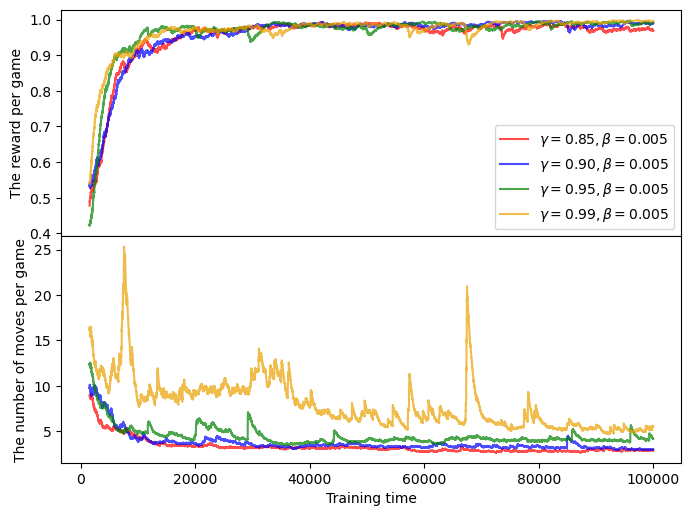

In [5]:
def EMA(arr,period=1500):    ## Function for computing exponential moving average
    df = pd.DataFrame(arr)
    return df.ewm(span=period,min_periods=period).mean()

re08=pd.read_excel(r'Results_diff_hyperparameters/result_hyperparameters_0.85_0.005.xlsx')
re09=pd.read_excel(r'Results_diff_hyperparameters/result_hyperparameters_0.9_0.005.xlsx')
re10=pd.read_excel(r'Results_diff_hyperparameters/result_hyperparameters_0.95_0.005.xlsx')
re11=pd.read_excel(r'Results_diff_hyperparameters/result_hyperparameters_0.99_0.005.xlsx')
beta = chr(946)
gamma = chr(947)
N_episodes = 100000

figure,(ax1,ax2)=plt.subplots(2,1,figsize=(8,6), dpi=100,sharex=True)


ax1.plot(range(N_episodes), EMA(re08['R_save']),c='r',alpha=0.7,label='$\gamma=0.85, \\beta=0.005$')
ax1.plot(range(N_episodes), EMA(re09['R_save']),c='b',alpha=0.7,label='$\gamma=0.90, \\beta=0.005$')
ax1.plot(range(N_episodes), EMA(re10['R_save']),c='g',alpha=0.7,label='$\gamma=0.95, \\beta=0.005$')
ax1.plot(range(N_episodes), EMA(re11['R_save']),c='#EBA000',alpha=0.7,label='$\gamma=0.99, \\beta=0.005$')

ax2.plot(range(N_episodes), EMA(re08['N_moves_save']),c='r',alpha=0.7,label='$\gamma=0.85, \\beta=0.005$')
ax2.plot(range(N_episodes), EMA(re09['N_moves_save']),c='b',alpha=0.7,label='$\gamma=0.90, \\beta=0.005$')
ax2.plot(range(N_episodes), EMA(re10['N_moves_save']),c='g',alpha=0.7,label='$\gamma=0.95, \\beta=0.005$')
ax2.plot(range(N_episodes), EMA(re11['N_moves_save']),c='#EBA000',alpha=0.7,label='$\gamma=0.99, \\beta=0.005$')

ax1.set_ylabel('The reward per game')
ax2.set_ylabel('The number of moves per game')
ax2.set_xlabel('Training time')

ax1.legend()

figure.subplots_adjust(hspace=0)
figure.savefig("Results_diff_hyperparameters/large_gamma_unstable.png")

### TRADEOFF between exploration and exploitation via $\beta$ 

In [ ]:
re02=pd.read_excel(r'Results_diff_hyperparameters/result_hyperparameters_0.95_5e-05.xlsx')
re06=pd.read_excel(r'Results_diff_hyperparameters/result_hyperparameters_0.95_0.0005.xlsx')
re10=pd.read_excel(r'Results_diff_hyperparameters/result_hyperparameters_0.95_0.005.xlsx')
re14=pd.read_excel(r'Results_diff_hyperparameters/result_hyperparameters_0.95_0.05.xlsx')
re18=pd.read_excel(r'Results_diff_hyperparameters/result_hyperparameters_0.95_0.5.xlsx')

N_episodes = 100000

figure,(ax1,ax2)=plt.subplots(2,1,figsize=(8,6), dpi=100,sharex=True)


ax1.plot(range(N_episodes), EMA(re02['R_save']),c='r',alpha=0.7,label='$\gamma=0.95, \\beta=0.00005$')
ax1.plot(range(N_episodes), EMA(re06['R_save']),c='b',alpha=0.7,label='$\gamma=0.95, \\beta=0.0005$')
ax1.plot(range(N_episodes), EMA(re10['R_save']),c='g',alpha=0.7,label='$\gamma=0.95, \\beta=0.005$')
ax1.plot(range(N_episodes), EMA(re14['R_save']),c='#EBA000',alpha=0.7,label='$\gamma=0.95, \\beta=0.05$')
ax1.plot(range(N_episodes), EMA(re18['R_save']),c='#D200FA',alpha=0.7,label='$\gamma=0.95, \\beta=0.5$')

ax2.plot(range(N_episodes), EMA(re02['N_moves_save']),c='r',alpha=0.7,label='$\gamma=0.95, \\beta=0.00005$')
ax2.plot(range(N_episodes), EMA(re06['N_moves_save']),c='b',alpha=0.7,label='$\gamma=0.95, \\beta=0.0005$')
ax2.plot(range(N_episodes), EMA(re10['N_moves_save']),c='g',alpha=0.7,label='$\gamma=0.95, \\beta=0.005$')
ax2.plot(range(N_episodes), EMA(re14['N_moves_save']),c='#EBA000',alpha=0.7,label='$\gamma=0.95, \\beta=0.05$')
ax2.plot(range(N_episodes), EMA(re18['N_moves_save']),c='#D200FA',alpha=0.7,label='$\gamma=0.95, \\beta=0.5$')

ax1.set_ylabel('The reward per game')
ax2.set_ylabel('The number of moves per game')
ax2.set_xlabel('Training time')

ax1.legend()

figure.subplots_adjust(hspace=0)
figure.savefig("Results_diff_hyperparameters/tradeoff_via_beta.png")

In [ ]:
re=pd.read_excel(r'Results_diff_rewards/Average_results_rewards.xlsx')
reward_list = [-1.5,-1.4,-1.3,-1.2,-1.1,-1.0,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0]

figure,(ax1,ax2)=plt.subplots(2,1,figsize=(8,6), dpi=100,sharex=True)

ax1.plot(re['reward of draw'], re['checkmate'],c='b',ls='-',marker='s',label='reward_checkmate = 1')
ax2.plot(re['reward of draw'], re['steps'],c='b',ls='-',marker='v',label='reward_checkmate = 1')


ax1.set_ylabel('The reward per game')
ax2.set_ylabel('The number of moves per game')
ax2.set_xlabel('Training time')
ax2.set_xticks(reward_list,reward_list)

ax1.axis([max(reward_list)+0.03,min(reward_list)-0.03,min(re['checkmate']),max(re['checkmate'])])

ax1.set_ylim((0.945, 1))

ax1.legend()
ax2.legend()

figure.subplots_adjust(hspace=0)
figure.savefig("Results_diff_rewards/reward_change.png")

In [ ]:
re000=pd.read_excel(r'Results_diff_rewards/result_r_draw_0.xlsx')
re003=pd.read_excel(r'Results_diff_rewards/result_r_draw_-0.3.xlsx')
re006=pd.read_excel(r'Results_diff_rewards/result_r_draw_-0.6.xlsx')
re009=pd.read_excel(r'Results_diff_rewards/result_r_draw_-0.9.xlsx')
re012=pd.read_excel(r'Results_diff_rewards/result_r_draw_-1.2.xlsx')
re015=pd.read_excel(r'Results_diff_rewards/result_r_draw_-1.5.xlsx')

N_episodes = 100000

figure,(ax1,ax2)=plt.subplots(2,1,figsize=(8,6), dpi=100,sharex=True)


ax1.plot(range(N_episodes), EMA(re000['N_checkmate_save']),c='r',alpha=0.7,label='reward of draw=0')
ax1.plot(range(N_episodes), EMA(re003['N_checkmate_save']),c='b',alpha=0.7,label='reward of draw=-0.3')
ax1.plot(range(N_episodes), EMA(re006['N_checkmate_save']),c='g',alpha=0.7,label='reward of draw=-0.6')
ax1.plot(range(N_episodes), EMA(re009['N_checkmate_save']),c='#EBA000',alpha=0.7,label='reward of draw=-0.9')
ax1.plot(range(N_episodes), EMA(re015['N_checkmate_save']),c='#D200FA',alpha=0.7,label='reward of draw=-1.5')

ax2.plot(range(N_episodes), EMA(re000['N_moves_save']),c='r',alpha=0.7,label='reward of draw=0')
ax2.plot(range(N_episodes), EMA(re003['N_moves_save']),c='b',alpha=0.7,label='reward of draw=-0.3')
ax2.plot(range(N_episodes), EMA(re006['N_moves_save']),c='g',alpha=0.7,label='reward of draw=-0.6')
ax2.plot(range(N_episodes), EMA(re009['N_moves_save']),c='#EBA000',alpha=0.7,label='reward of draw=-0.9')
ax2.plot(range(N_episodes), EMA(re015['N_moves_save']),c='#D200FA',alpha=0.7,label='reward of draw=-1.5')

ax1.set_ylabel('The reward per game')
ax2.set_ylabel('The number of moves per game')
ax2.set_xlabel('Training time')

ax1.legend()

figure.subplots_adjust(hspace=0)
figure.savefig("Results_diff_rewards/reward_draw_in_all_episodes.png")